In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**IMPORT DATASET**

The dataset is too large to be uploaded on kaggle, however it can be found at: https://drive.google.com/file/d/1ZRLFsZghXcOgpRHAAmagCYOg9i4ono9Q/view?usp=sharing

Another way could be by running the command
```
from tensorflow.examples.tutorials.mnist import input_data.
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
```

In [ ]:
df= pd.read_csv('/content/digit_svm.csv')

In [ ]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**DATA VISUALIZATION**

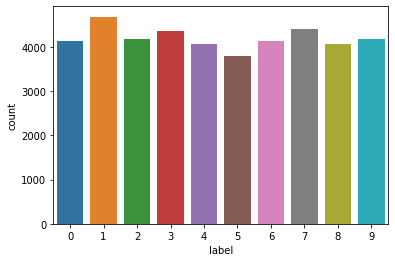

In [ ]:
import seaborn as sns
sns.countplot(x = 'label' , data = df)
plt.show()

The dataset here is a balanced dataset so let's fix accuracy as a mtric.

**DATA PREPROCESSING**

Check for null values and replacing it

In [ ]:
df.isnull().sum()
df.fillna(value=0)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(999, inplace=True)

**SPLITTED THE DATASET FOR TRAINING AND TESTING**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x= df.iloc[:, 1:].values
y= df.iloc[:, 0].values

In [ ]:
print(x.shape)

(42000, 784)


In [ ]:
train_x, test_x, train_y, test_y= train_test_split(x, y, test_size= 0.2, random_state= 104)

**VISUALIZE THE DIGIT BY RESHAPING**

In [ ]:
img= df.iloc[3, 1:].values
img= img.reshape(28,28)

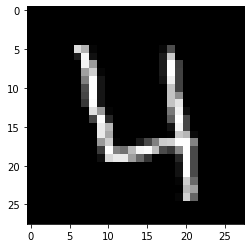

In [ ]:
plt.imshow(img, cmap= 'gray')

**Normalization** :

Normalizing the values of pixels using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st= StandardScaler()
train_x= st.fit_transform(train_x)
test_x= st.fit_transform(test_x)

**Build a Linear Kernel SVC model**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, multilabel_confusion_matrix

In [ ]:
svc_clf= SVC(kernel= 'linear')

In [ ]:
svc_clf.fit(train_x, train_y)

In [ ]:
pred_y= svc_clf.predict(test_x)

**ACCURACY FOR LINEAR MODEL**

In [ ]:
accuracy_score(test_y, pred_y)

0.9189285714285714

**CLASSIFICATION REPORT**

In [ ]:
acc_report= classification_report(test_y, pred_y)
print(acc_report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       897
           1       0.95      0.98      0.97       930
           2       0.89      0.92      0.90       827
           3       0.87      0.89      0.88       836
           4       0.90      0.93      0.91       800
           5       0.89      0.86      0.87       758
           6       0.96      0.95      0.95       861
           7       0.94      0.93      0.94       845
           8       0.92      0.88      0.90       792
           9       0.91      0.87      0.89       854

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400



**BUILD A RBF KERNEL MODEL**

In [ ]:
svc_rbf= SVC()

In [ ]:
svc_rbf.fit(train_x, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predrbf_y= svc_rbf.predict(test_x)

In [ ]:
accuracy_score(test_y, predrbf_y)

0.9586904761904762

In [ ]:
acc_report= classification_report(test_y, predrbf_y)
print(acc_report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       897
           1       0.98      0.98      0.98       930
           2       0.94      0.95      0.95       827
           3       0.95      0.95      0.95       836
           4       0.95      0.96      0.95       800
           5       0.96      0.93      0.95       758
           6       0.97      0.98      0.97       861
           7       0.93      0.97      0.95       845
           8       0.96      0.94      0.95       792
           9       0.96      0.94      0.95       854

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



**Best Estimator Given by GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':[1,10 , 100] , 
              'gamma' :[1e-2 , 1e-3 , 1e-4 ],
              'kernel' :['linear' ,'rbf']
              }

svc_grid_search = svm.SVC()
# create a classifier to perform grid search
clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy')

# fit
clf.fit(x_train, y_train)
clf.best_estimator_

In [ ]:
model = SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True,
    tol=0.001, verbose=False)

model.fit(train_x , train_y)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = model.predict(test_x)

In [ ]:
accuracy_score(test_y,y_pred)

0.9672619047619048

**CONFUSION MATRIX**

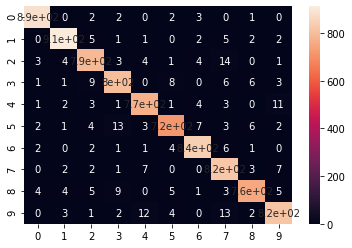

In [ ]:
cm=confusion_matrix(test_y,y_pred)
sns.heatmap(pd.DataFrame(cm), annot=True)

**Finally achieved 96.7% of accuracy score by using best estimators given by gridsearchcv**